<a href="https://colab.research.google.com/github/thebabycode/Neural-Networks-and-Deep-Learning/blob/main/NNDL_Lab8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG19(weights='imagenet', include_top=False)

img_path = '/content/bird.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 855ms/step


In [ ]:
# Keras, dataset, and VGG19 imports
import keras
from keras.datasets import cifar10
from keras.applications import VGG19

In [ ]:
# Loading VGG19 with imagenet weights
from keras.layers import Input

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)
  
# freeze all weights
for layer in model.layers:
  layer.trainable = False
  
# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# load dataset
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
import numpy as np
import cv2

In [ ]:
import matplotlib.pyplot as plt

NUM_CLASSES = 10

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [ ]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i]) 
  else:
    print("error, please specify train or val")
   
  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch

In [ ]:
EPOCHS = 1
BATCH_SIZE = 20
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0
  
  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]
  
  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")
  
  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")
  

Epoch: 0
Training Loss = 1.731717050075531	Training Acc = 0.5380000019073486
16/16 [==============================] - 335s 21s/step - loss: 0.9520 - categorical_accuracy: 0.6760
Validation loss: 0.951953649520874	Validation Acc: 0.6759999990463257



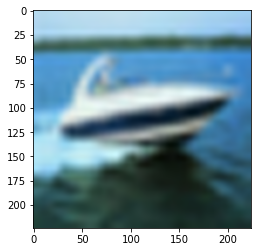

1/1 [==============================] - 2s 2s/step
pred: ship
acct: ship


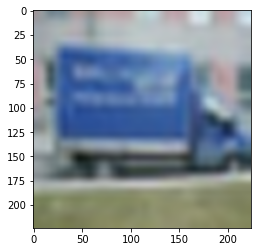

1/1 [==============================] - 2s 2s/step
pred: truck
acct: truck


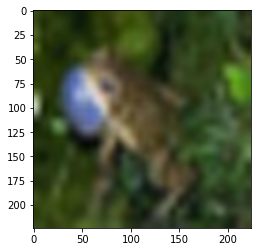

1/1 [==============================] - 2s 2s/step
pred: deer
acct: frog


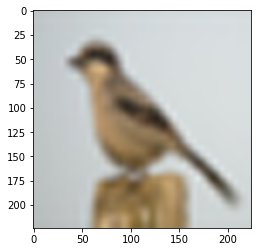

1/1 [==============================] - 1s 1s/step
pred: bird
acct: bird


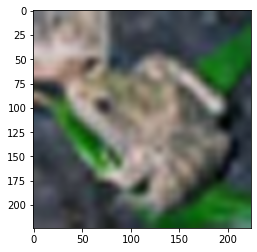

1/1 [==============================] - 1s 1s/step
pred: frog
acct: frog


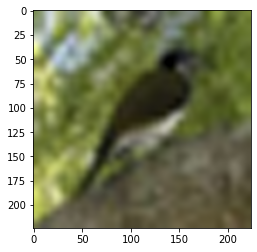

1/1 [==============================] - 1s 837ms/step
pred: frog
acct: bird


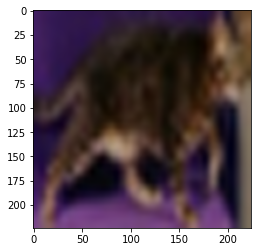

1/1 [==============================] - 1s 762ms/step
pred: dog
acct: cat


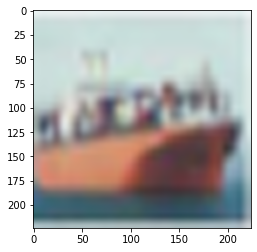

1/1 [==============================] - 1s 808ms/step
pred: truck
acct: ship


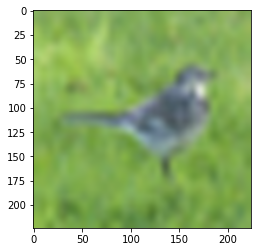

1/1 [==============================] - 1s 759ms/step
pred: bird
acct: bird


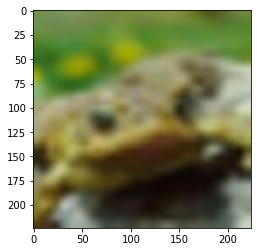

1/1 [==============================] - 1s 766ms/step
pred: frog
acct: frog


In [ ]:
  # Sample outputs from validation set
CATEGORIES = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

  for i in range(10):
    plt.imshow(x_v[i])
    plt.show()
    print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
    print("acct: " + CATEGORIES[np.argmax(y_v[i])])